# Lista 01

In [129]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal, pearsonr, norm, bernoulli
from itertools import combinations

import statsmodels.api as sm

## Ex2b

In [130]:
rho_xy = 0.90
rho_xz = 0.90
rho_yz = 0.68

rho_yz_x_exact = (rho_yz - rho_xy * rho_xz) / np.sqrt((1 - rho_xy**2)*(1 - rho_xz**2))
print(f"Exact rho_yz|x = {rho_yz_x_exact}")

Exact rho_yz|x = -0.6842105263157897


In [131]:
mean = np.array([0, 0, 0])
covariance_matrix = np.array([[1, rho_xy, rho_xz], [rho_xy, 1, rho_yz], [rho_xz, rho_yz, 1]])

num_samples = 10000
samples = np.random.multivariate_normal(mean, covariance_matrix, num_samples)
x, y, z = samples[:,0], samples[:,1], samples[:,2]

print(f"rho_yz = {pearsonr(y,z)[0]}")

rho_yz = 0.6831514978170101


In [132]:
mean_cond = np.array([0, 0])
rho_xy_xz = np.array([[rho_xy, rho_xz]])
covariance_matrix_cond = np.array([[1, rho_yz], [rho_yz, 1]]) - np.matmul(np.transpose(rho_xy_xz),rho_xy_xz)

samples_cond = np.random.multivariate_normal(mean_cond, covariance_matrix_cond, num_samples)
y_cond, z_cond = samples_cond[:,0], samples_cond[:,1]

print(f"rho_yz|x = {pearsonr(y_cond,z_cond)[0]}")


rho_yz|x = -0.6818993315754049


In [133]:
covariance_matrix_cond

array([[ 0.19, -0.13],
       [-0.13,  0.19]])

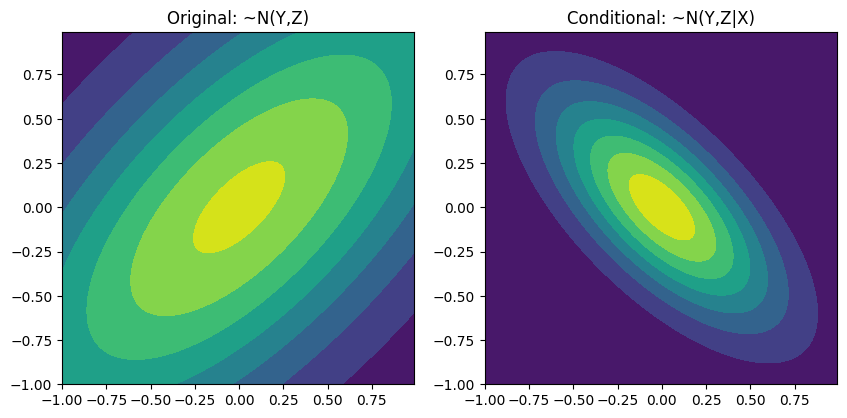

In [134]:
x, y = np.mgrid[-1:1:.01, -1:1:.01]
pos = np.dstack((x, y))

rv1 = multivariate_normal(mean[1:], covariance_matrix[1:,1:])
rv2 = multivariate_normal(mean_cond, covariance_matrix_cond)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].contourf(x, y, rv1.pdf(pos))
axs[0].set_title('Original: ~N(Y,Z)')
axs[0].set_aspect('equal', adjustable='box')

axs[1].contourf(x, y, rv2.pdf(pos))
axs[1].set_title('Conditional: ~N(Y,Z|X)')
axs[1].set_aspect('equal', adjustable='box')

plt.show()

## Ex 4b

In [135]:
n_samples = 10000
y_0 = norm.rvs(loc=0, scale=1, size=n_samples)
tau = -0.5 + y_0
y_1 = y_0 + tau
z = np.where(tau >= 0, 1, 0)
y = z * y_1 + (1-z) * y_0

In [136]:
E_y_z_1 = np.mean(y[z==1])
E_y_z_0 = np.mean(y[z==0])

print(f'E[Y|Z=1] = {E_y_z_1}')
print(f'E[Y|Z=0] = {E_y_z_0}')
print(f'Delta = {E_y_z_1 - E_y_z_0}')

E[Y|Z=1] = 1.7651812774593907
E[Y|Z=0] = -0.5021204947302008
Delta = 2.2673017721895916


In [137]:
fi_05 = norm.pdf(0.5, loc=0, scale=1)
Fi_05 = norm.cdf(0.5, loc=0, scale=1)
E_y_z_1_exact = -0.5 + 2 * fi_05 / (1 - Fi_05)
E_y_z_0_exact = -fi_05 / Fi_05

print("Exact")
print(f'E[Y|Z=1] = {E_y_z_1_exact}')
print(f'E[Y|Z=0] = {E_y_z_0_exact}')
print(f'Delta = {E_y_z_1_exact - E_y_z_0_exact}')

Exact
E[Y|Z=1] = 1.7821555407361296
E[Y|Z=0] = -0.5091604338370336
Delta = 2.291315974573163


## Ex05

In [138]:
n_samples = 10000

p_1 = 0.5
y_1 = bernoulli.rvs(p_1, size=n_samples)
p_0 = 0.3
y_0 = bernoulli.rvs(p_0, size=n_samples)

tau = sum(y_1 - y_0) / n_samples
print(f'tau = {tau}')

y_1_gt_y_0 = np.sum(y_1>y_0) / n_samples
print(f'%[Y(1)>Y(0)] = {y_1_gt_y_0 *100}%')


tau = 0.2012
%[Y(1)>Y(0)] = 35.089999999999996%


In [139]:
print("Exact")
tau_Exact = p_1 - p_0
print(f'tau = {tau}')

y_1_gt_y_0 = np.sum(y_1>y_0) / n_samples
print(f'%[Y(1)>Y(0)] = {p_1 * (1-p_0) * 100}%')

Exact
tau = 0.2012
%[Y(1)>Y(0)] = 35.0%


## Ex03


### NSW Data Files (Lalonde Sample)
    
These files contain the treated and control units from the male sub-sample from the National Supported Work Demonstration as used by Lalonde in his paper.

* nsw_treated.txt (297 observations)
* nsw_control.text (425 observations) 

These are text files. The order of the variables from left to right is: treatment indicator (1 if treated, 0 if not treated), age, education, Black (1 if black, 0 otherwise), Hispanic (1 if Hispanic, 0 otherwise), married (1 if married, 0 otherwise), nodegree (1 if no degree, 0 otherwise), RE75 (earnings in 1975), and RE78 (earnings in 1978). The last variable is the outcome; other variables are pre-treatment.

* nsw.dta NSW treated and control observations in Stata format

### NSW Data Files (Dehejia-Wahha Sample)

Based on pre-intervention variables, we extract a further subset of Lalonde's NSW experimental data, a subset containing information on RE74 (earnings in 1974):

* nswre74_control.txt (260 observations)

* nswre74_treated.txt (185 observations)

The variables from left to right are: treatment indicator (1 if treated, 0 if not treated), age, education, Black (1 if black, 0 otherwise), Hispanic (1 if Hispanic, 0 otherwise), married (1 if married, 0 otherwise), nodegree (1 if no degree, 0 otherwise), RE74 (earnings in 1974), RE75 (earnings in 1975), and RE78 (earnings in 1978).

* nsw_dw.dta NSW treated and control observations (Dehejia-Wahba Sample) in Stata format 

### Sources:
* https://users.nber.org/~rdehejia/nswdata2.html
* https://www.rdocumentation.org/packages/Matching/versions/4.10-14/topics/lalonde

In [140]:
column_names = ['treated', 'age', 'education', 'black', 'hispanic', 'married', 'nodegree', 'RE74', 'RE75', 'RE78']
df_treated = pd.read_csv('nswre74_treated.txt', names=column_names, sep=r"\s+|;|:", engine='python')
df_control = pd.read_csv('nswre74_control.txt', names=column_names, sep=r"\s+|;|:", engine='python')
df = pd.concat ([df_treated, df_control])

df['u74'] = (df['RE74'] == 0).astype(int)
df['u75'] = (df['RE75'] == 0).astype(int)

new_column_names = ['treated', 'age', 'education', 'black', 'hispanic', 'married', 'nodegree', 'RE74', 'RE75', 'u74', 'u75', 'RE78']
df = df.reindex(columns=new_column_names)

In [141]:
df.describe()

,treated,age,education,black,hispanic,married,nodegree,RE74,RE75,u74,u75,RE78
count,445.000000,445.000000,445.000000,445.000000,445.00000,445.000000,445.000000,445.000000,445.000000,445.000000,445.000000,445.000000
mean,0.415730,25.370787,10.195506,0.833708,0.08764,0.168539,0.782022,2102.265311,1377.138368,0.732584,0.649438,5300.763699
std,0.493402,7.100282,1.792119,0.372762,0.28309,0.374766,0.413337,5363.582400,3150.960771,0.443109,0.477683,6631.491695
min,0.000000,17.000000,3.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,20.000000,9.000000,1.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,24.000000,10.000000,1.000000,0.00000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,3701.812000
75%,1.000000,28.000000,11.000000,1.000000,0.00000,0.000000,1.000000,824.388900,1220.836000,1.000000,1.000000,8124.715000
max,1.000000,55.000000,16.000000,1.000000,1.00000,1.000000,1.000000,39570.680000,25142.240000,1.000000,1.000000,60307.930000


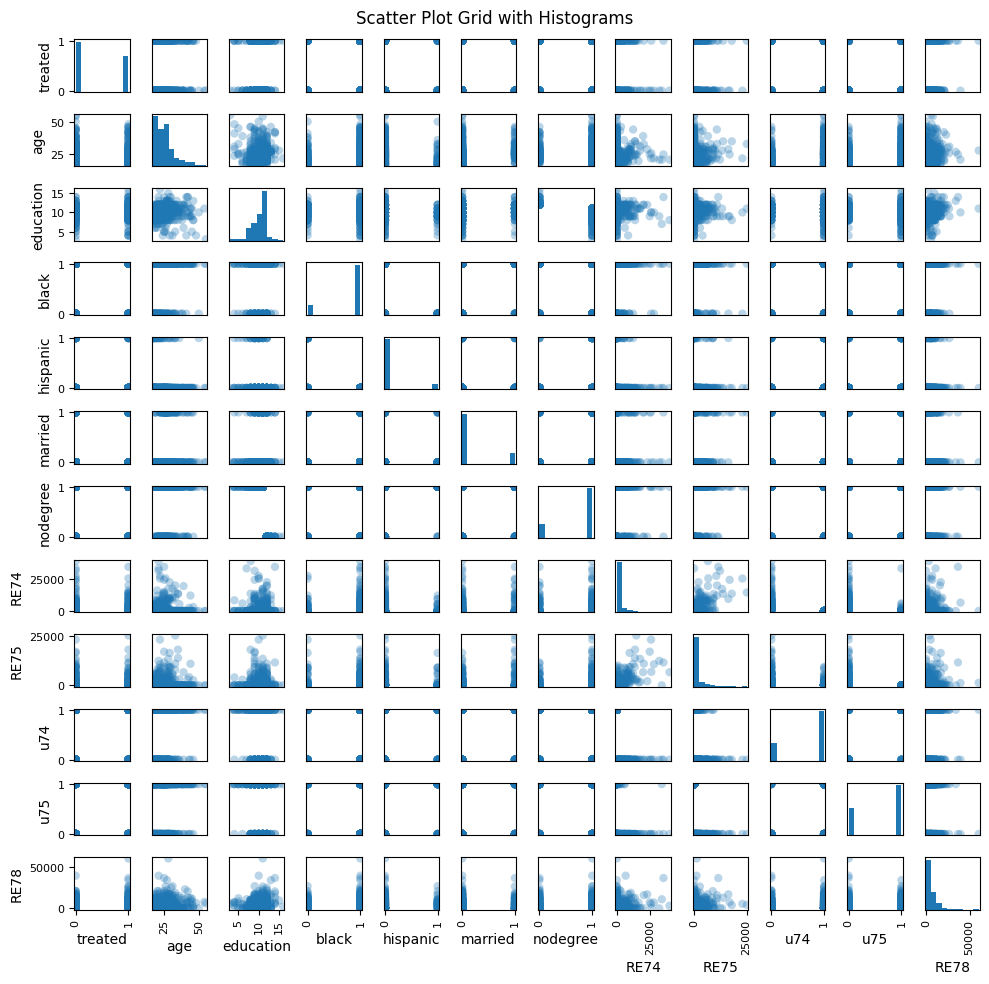

In [142]:
pd.plotting.scatter_matrix(df, alpha=0.3, figsize=(10, 10), diagonal="hist", marker="o")
plt.suptitle("Scatter Plot Grid with Histograms")
plt.tight_layout()
plt.show()

In [143]:
def get_all_combinations(n):
    combinations_list = [()]
    for i in range(1, n+1):
        combinations_i = list(combinations(range(1, n+1), i))
        combinations_list.extend(combinations_i)
    return combinations_list

In [144]:
len(get_all_combinations(10))

1024

In [149]:
treated_coefficients = []
se_ehw = []
se_hc2 = []
all_combinations = get_all_combinations(10)
for combination in all_combinations:
    y_columns = ['treated'] + [new_column_names[i] for i in combination]
    model = sm.OLS(df['RE78'], sm.add_constant((df[y_columns])))
    results = model.fit(cov_type='HC2')

    treated_coefficients.append(results.params['treated'])
    
    robust_se_ehw = results.get_robustcov_results().bse
    se_ehw.append(robust_se_ehw[1])

    robust_se_hc2 = results.HC2_se
    se_hc2.append(robust_se_hc2['treated'])


In [165]:
test_stats = [abs(t_hat)/se_hat for t_hat,se_hat in zip(treated_coefficients, se_hc2)]
significance_limit = norm.ppf(0.995)
print(f'Significance level: {(1-0.995)*100:.2f}%')

is_h0n = [1 if t_stat < significance_limit else 0 for t_stat in test_stats]

not_significative = sum(is_h0n)/len(all_combinations)
print(f'Treatment was not significative: {not_significative*100:0.2f}%')

positive_significative = [1 for h0n,t_hat in zip(is_h0n, treated_coefficients) if (h0n == 0 and t_hat>0)]
positive_significative_pc = sum(positive_significative)/len(all_combinations)
print(f'Treatment was positive and significative: {positive_significative_pc*100:0.2f}%')

negative_significative = [1 for h0n,t_hat in zip(is_h0n, treated_coefficients) if (h0n == 0 and t_hat<0)]
negative_significative_pc = sum(negative_significative)/len(all_combinations)
print(f'Treatment was negative and significative: {negative_significative_pc*100:0.2f}%')

Significance level: 0.50%
Treatment was not significative: 70.70%
Treatment was positive and significative: 29.30%
Treatment was negative and significative: 0.00%


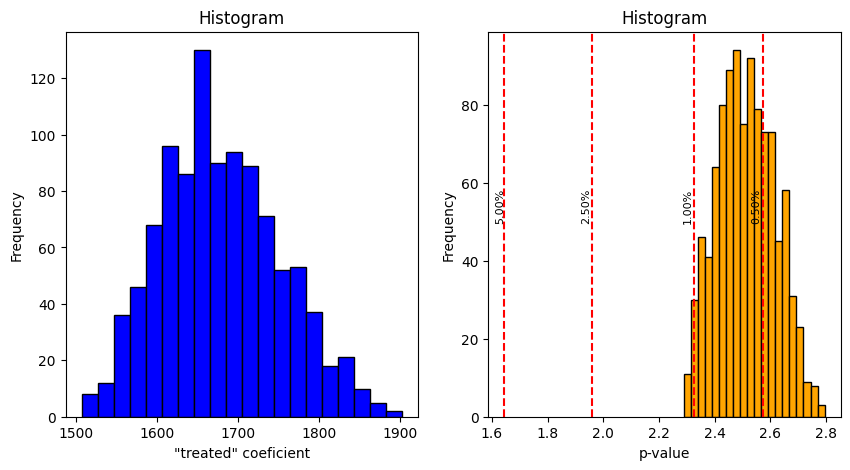

In [150]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].hist(treated_coefficients, bins=20, color='blue', edgecolor='black')
axs[0].set_xlabel('"treated" coeficient')
axs[0].set_ylabel('Frequency')
axs[0].set_title('Histogram')

axs[1].hist(test_stats, bins=20, color='orange', edgecolor='black')
axs[1].set_xlabel('p-value')
axs[1].set_ylabel('Frequency')
axs[1].set_title('Histogram')

for p in [0.95, 0.975, 0.99, 0.995]:
    significance_limit = norm.ppf(p)
    axs[1].axvline(x=significance_limit, color='r', linestyle='--')
    axs[1].annotate(f'{100-p*100:0.2f}%', 
                    xy=(significance_limit, 50), 
                    xytext=(significance_limit*.99, 50),
                    fontsize=8, ha='center', rotation=90)

plt.show()

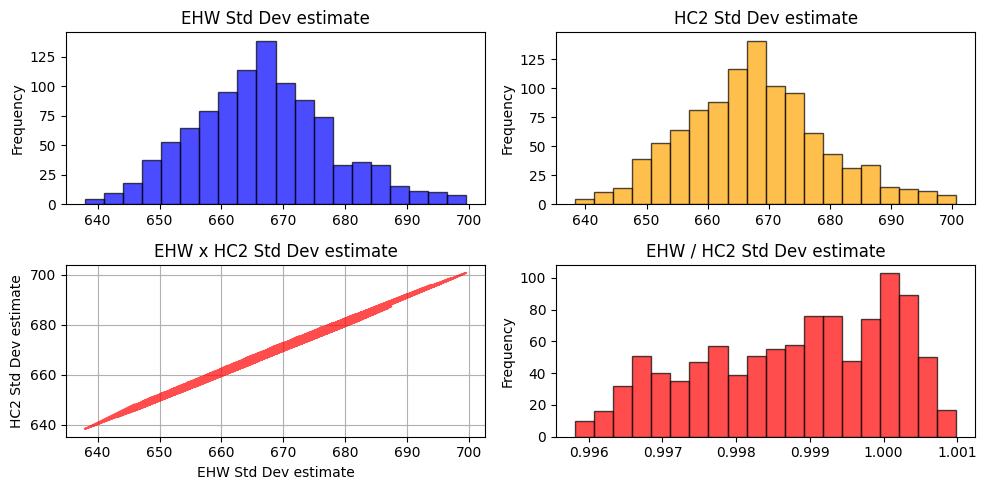

In [147]:
fig, axs = plt.subplots(2, 2, figsize=(10, 5))

axs[0][0].hist(se_ehw, bins=20, color='blue', alpha=0.7, edgecolor='black')
axs[0][0].set_title('EHW Std Dev estimate')
axs[0][0].set_ylabel('Frequency')

axs[0][1].hist(se_hc2, bins=20, color='orange', alpha=0.7, edgecolor='black')
axs[0][1].set_title('HC2 Std Dev estimate')
axs[0][1].set_ylabel('Frequency')

axs[1][0].plot(se_ehw, se_hc2, color='red', alpha=0.7)
axs[1][0].set_title('EHW x HC2 Std Dev estimate')
axs[1][0].set_xlabel('EHW Std Dev estimate')
axs[1][0].set_ylabel('HC2 Std Dev estimate')
axs[1][0].grid()

axs[1][1].hist([se_ehw/se_hc2 for se_ehw, se_hc2 in zip(se_ehw, se_hc2)], bins=20, color='red', alpha=0.7, edgecolor='black')
axs[1][1].set_title('EHW / HC2 Std Dev estimate')
axs[1][1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()